<a href="https://colab.research.google.com/github/samihahaha/CSIT696/blob/main/3_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
pip install neuralprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.4/145.4 kB 812.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 20.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1

In [4]:
df = pd.read_csv('final_merge.csv')

df.head()

,Unnamed: 0,ds,y,sentiment_score
0,0,2021-09-30,258.493347,0.717376
1,1,2021-10-01,258.406677,0.704034
2,2,2021-10-04,260.510010,0.699326
3,3,2021-10-05,260.196655,0.713094
4,4,2021-10-06,260.916656,0.719904


In [5]:
columns_to_drop = [col for col in df.columns if col not in ['ds', 'y', 'sentiment_score']]
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.head()

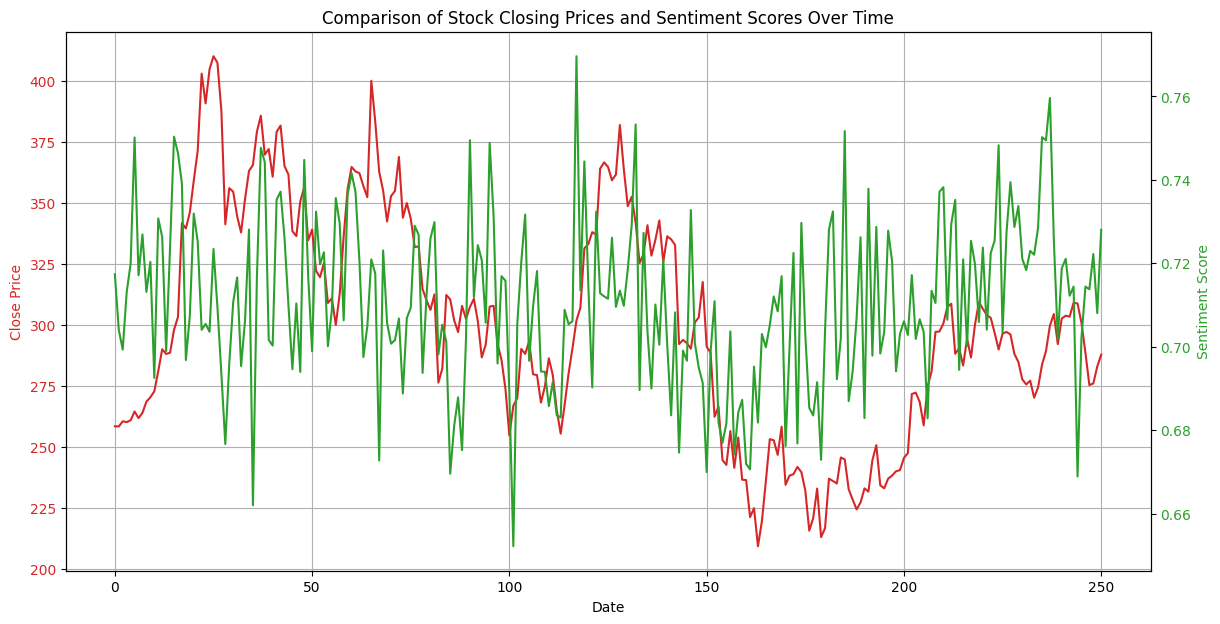

In [9]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting the closing prices on the primary y-axis
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color=color)
ax1.plot(df.index, df['y'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the sentiment scores
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Sentiment Score', color=color)
ax2.plot(df.index, df['sentiment_score'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Adding title and customizing grid
plt.title('Comparison of Stock Closing Prices and Sentiment Scores Over Time')
ax1.grid(True)

# Show plot
plt.show()

In [10]:
correlation = df[['y', 'sentiment_score']].corr()
print(correlation)

                        y  sentiment_score
y                1.000000         0.209142
sentiment_score  0.209142         1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ds               251 non-null    object 
 1   y                251 non-null    float64
 2   sentiment_score  251 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.0+ KB


In [12]:
df['ds'] = pd.to_datetime(df['ds'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ds               251 non-null    datetime64[ns]
 1   y                251 non-null    float64       
 2   sentiment_score  251 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 6.0 KB


In [14]:
from neuralprophet import NeuralProphet, set_log_level, set_random_seed

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Model and prediction
m = NeuralProphet(
    n_changepoints=20,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
      # Autogression
    )

set_random_seed(0)

m.add_lagged_regressor("sentiment_score", n_lags=3)

# Continue training the model and making a prediction
metrics = m.fit(df)
forecast = m.predict(df)

ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.


Finding best initial lr:   0%|          | 0/213 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

In [19]:
m.highlight_nth_step_ahead_of_each_forecast(1)
m.plot(forecast)

In [20]:
# visualize model parameters of lagged regression
m.plot_parameters(components=["lagged_regressors"])

In [21]:
m.plot_components(forecast, components=["lagged_regressors"])

In [22]:
forecast

,ds,y,yhat1,lagged_regressor_sentiment_score1,trend,season_yearly,season_weekly
0,2021-09-30,258.493347,NaN,NaN,NaN,NaN,NaN
1,2021-10-01,258.406677,NaN,NaN,NaN,NaN,NaN
2,2021-10-04,260.510010,NaN,NaN,NaN,NaN,NaN
3,2021-10-05,260.196655,238.965942,15.456300,234.633255,-7.572198,-3.551418
4,2021-10-06,260.916656,244.851242,15.468104,234.798050,-3.440187,-1.974717
...,...,...,...,...,...,...,...
246,2022-09-22,288.589996,286.474121,13.183442,323.742065,-47.373119,-3.078273
247,2022-09-23,275.329987,287.060425,12.366120,323.946655,-45.532791,-3.719569
248,2022-09-26,276.010010,298.919189,16.376383,324.560547,-38.793476,-3.224275
249,2022-09-27,282.940002,303.567963,18.532106,324.765167,-36.149876,-3.579423


In [23]:
m = NeuralProphet(
    n_changepoints=10,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
      # Autogression
)



m.add_lagged_regressor("sentiment_score", n_lags = 3)

# Continue training the model and making a prediction
metrics = m.fit(df)

Finding best initial lr:   0%|          | 0/213 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [24]:
forecast

,ds,y,yhat1,lagged_regressor_sentiment_score1,trend,season_yearly,season_weekly
0,2021-09-30,258.493347,NaN,NaN,NaN,NaN,NaN
1,2021-10-01,258.406677,NaN,NaN,NaN,NaN,NaN
2,2021-10-04,260.510010,NaN,NaN,NaN,NaN,NaN
3,2021-10-05,260.196655,238.965942,15.456300,234.633255,-7.572198,-3.551418
4,2021-10-06,260.916656,244.851242,15.468104,234.798050,-3.440187,-1.974717
...,...,...,...,...,...,...,...
246,2022-09-22,288.589996,286.474121,13.183442,323.742065,-47.373119,-3.078273
247,2022-09-23,275.329987,287.060425,12.366120,323.946655,-45.532791,-3.719569
248,2022-09-26,276.010010,298.919189,16.376383,324.560547,-38.793476,-3.224275
249,2022-09-27,282.940002,303.567963,18.532106,324.765167,-36.149876,-3.579423


In [25]:
train_size = int(0.9 * len(df))
df_train, df_val = df.iloc[:train_size], df.iloc[train_size:]

In [26]:
set_log_level("ERROR")

# Initialize the model with specified parameters
m7 = NeuralProphet(
    n_changepoints=12,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    n_forecasts=20
)

# Set a random seed for reproducibility
set_random_seed(0)

# Add the regressor
m7.add_future_regressor("sentiment_score")

# Fit the model to the dataframe
metrics_7 = m7.fit(df, freq="M")

# Ensure df_snt is a DataFrame with appropriate columns
df_snt = df_train[['sentiment_score']]

# Determine the number of periods to forecast based on the length of df_val
num_periods = len(df_val)

# Create a future dataframe for making predictions
# This should include historic predictions and a number of future periods equivalent to the length of df_val
future1 = m7.make_future_dataframe(df_train, regressors_df=df_snt, n_historic_predictions=True, periods=num_periods)

# Make predictions
forecast = m7.predict(future1)

Finding best initial lr:   0%|          | 0/213 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

In [27]:
m.plot(forecast)

In [28]:
set_log_level("ERROR")

# Initialize the model with specified parameters
m8 = NeuralProphet(
    n_changepoints=12,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    n_forecasts=20
)

# Set a random seed for reproducibility
set_random_seed(0)

# Add the regressor
m8.add_future_regressor("sentiment_score")

# Fit the model to the dataframe
metrics_8 = m8.fit(df, freq="M")

# Ensure df_snt is a DataFrame with appropriate columns
df_snt = df_train[['sentiment_score']]

# Determine the number of periods to forecast based on the length of df_val
num_periods = len(df_val)

# Create a future dataframe for making predictions
# This should include historic predictions and a number of future periods equivalent to the length of df_val
future1 = m8.make_future_dataframe(df_train, regressors_df=df_snt, n_historic_predictions=True, periods=3)

# Make predictions
forecast = m8.predict(future1)

Finding best initial lr:   0%|          | 0/213 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

In [29]:
m8.plot(forecast)

In [30]:
m8.plot_components(forecast)

In [31]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import numpy as np

# Compute Mean Absolute Error (MAE)
mae = np.mean(np.abs(df_val['y'] - forecast['yhat1']))

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((df_val['y'] - forecast['yhat1']) ** 2))

# Compute Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((df_val['y'] - forecast['yhat1']) / df_val['y'])) * 100

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)



Mean Absolute Error (MAE): 48.503885904947914
Root Mean Squared Error (RMSE): 76.84955770355394
Mean Absolute Percentage Error (MAPE): 16.37847985495172


In [36]:
set_log_level("ERROR")

# Initialize the model with specified parameters
m9 = NeuralProphet(
    n_changepoints=12,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    n_forecasts=20
)

# Set a random seed for reproducibility
set_random_seed(0)

# Add the regressor
m9.add_future_regressor("sentiment_score")

# Fit the model to the dataframe
metrics_9 = m9.fit(df_train)

# Ensure df_snt is a DataFrame with appropriate columns
df_snt = df_val[['sentiment_score']]

# Determine the number of periods to forecast based on the length of df_val
num_periods = len(df_val)

# Create a future dataframe for making predictions
# This should include historic predictions and a number of future periods equivalent to the length of df_val
future1 = m9.make_future_dataframe(df_train, regressors_df=df_snt,  periods=num_periods)

# Make predictions
forecast = m9.predict(future1)

Finding best initial lr:   0%|          | 0/212 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 15it [00:00, ?it/s]

In [33]:
m9.plot(forecast)

Predicting: 15it [00:00, ?it/s]

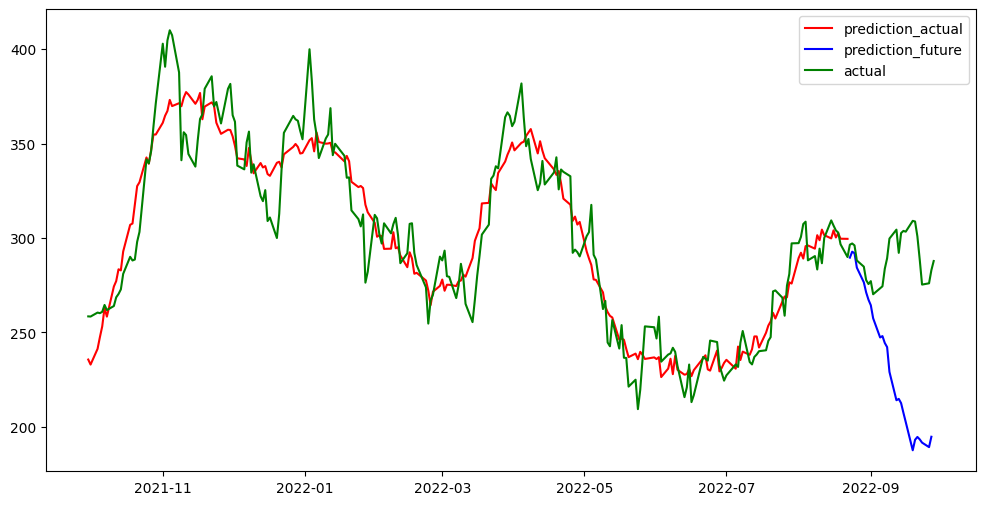

In [37]:
actual_prediction = m9.predict(df_train)

plt.figure(figsize=(12, 6))

plt.plot(actual_prediction['ds'], actual_prediction['yhat1'], label = 'prediction_actual', c = 'r')

plt.plot(forecast['ds'], forecast['yhat1'], label = 'prediction_future', c = 'b')

plt.plot(df['ds'], df['y'], label = 'actual', c = 'g')

plt.legend()
plt.show()

In [35]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import numpy as np

# Compute Mean Absolute Error (MAE)
mae = np.mean(np.abs(df_val['y'] - forecast['yhat1']))

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((df_val['y'] - forecast['yhat1']) ** 2))

# Compute Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((df_val['y'] - forecast['yhat1']) / df_val['y'])) * 100

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 55.50879141000601
Root Mean Squared Error (RMSE): 68.6662203801646
Mean Absolute Percentage Error (MAPE): 18.887461963935426


In [33]:
print(len(df_train))
print(len(df_val))

200
51


In [34]:
train_size = int(0.8 * len(df))
df_train, df_val = df.iloc[:train_size], df.iloc[train_size:]

In [35]:
print(len(df_train))
print(len(df_val))

200
51


In [62]:
set_log_level("ERROR")

# Initialize the model with specified parameters
m10 = NeuralProphet(
    n_changepoints=12,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,

)

# Set a random seed for reproducibility
set_random_seed(0)

# Add the regressor
m10.add_future_regressor("sentiment_score")

# Fit the model to the dataframe
metrics_10 = m10.fit(df_train)

# Ensure df_snt is a DataFrame with appropriate columns
df_snt = df_val[['sentiment_score']]

# Determine the number of periods to forecast based on the length of df_val
num_periods = len(df_val)

# Create a future dataframe for making predictions
# This should include historic predictions and a number of future periods equivalent to the length of df_val
future1 = m10.make_future_dataframe(df_train, regressors_df=df_snt, n_historic_predictions=True, periods=num_periods)

# Make predictions
forecast = m10.predict(future1)



Finding best initial lr:   0%|          | 0/212 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 15it [00:00, ?it/s]

In [63]:
m10.plot(forecast)

In [66]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import numpy as np

# Compute Mean Absolute Error (MAE)
mae = np.mean(np.abs(df_val['y'] - forecast['yhat1']))

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((df_val['y'] - forecast['yhat1']) ** 2))

# Compute Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((df_val['y'] - forecast['yhat1']) / df_val['y'])) * 100

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 55.50879141000601
Root Mean Squared Error (RMSE): 68.6662203801646
Mean Absolute Percentage Error (MAPE): 18.887461963935426


Predicting: 15it [00:00, ?it/s]

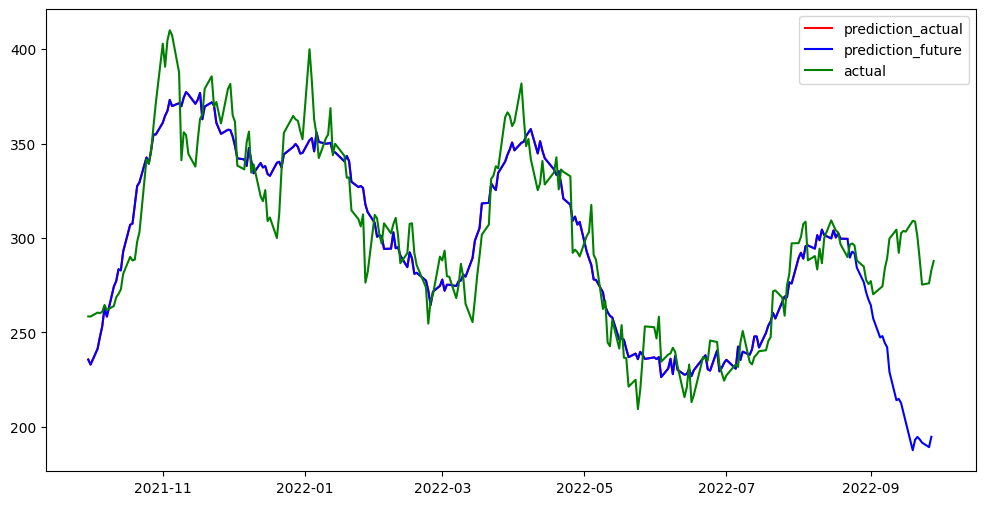

In [67]:
actual_prediction = m10.predict(df_train)

plt.figure(figsize=(12, 6))

plt.plot(actual_prediction['ds'], actual_prediction['yhat1'], label = 'prediction_actual', c = 'r')

plt.plot(forecast['ds'], forecast['yhat1'], label = 'prediction_future', c = 'b')

plt.plot(df['ds'], df['y'], label = 'actual', c = 'g')

plt.legend()
plt.show()